In [32]:
import numpy as np
from tqdm import tqdm           #进度条
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")    #darkgrid #whitegrid
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


C:\Users\lyw\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [33]:
#参数
gamma=1                                              #折现率
rewardSize=-1 
gridSize=4                                           #网格大小
terminationStates=[[0,0],[gridSize-1,gridSize-1]]   #[0,0]  [3,3]结束位置
actions=[[-1,0],[1,0],[0,1],[0,-1]]                 #对应 上  下  右   左
numIterations=1000                                   #迭代次数

In [34]:
valueMap=np.zeros((gridSize,gridSize))                                 #初始化全0矩阵
states=[[i,j] for i in range(gridSize) for j in range(gridSize)]       #16个位置

In [35]:
valueMap

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

![jupyter](./first.jpg)

In [36]:
def actionRewardFunction(initialPosition, action):      #计算相邻位置是否存在
    if initialPosition in terminationStates:            #结束位置不用计算
        return initialPosition, 0
    reward = rewardSize 
    finalPosition = np.array(initialPosition) + np.array(action)
    if -1 in finalPosition or 4 in finalPosition:       #位置不存在，用原始位置代替
        finalPosition = initialPosition
    return finalPosition, reward

In [37]:
deltas = []
for it in range(1000):#
    copyValueMap = np.copy(valueMap)
    deltaState = []
    for state in states:                                #16个位置
        weightedRewards = 0       
        for action in actions:                          #每个位置4种运动方向
            finalPosition, reward = actionRewardFunction(state, action)
           # print("finalPosition, reward",finalPosition, reward)
            weightedRewards += (1/len(actions))*(reward+(gamma*valueMap[finalPosition[0], finalPosition[1]]))
           # print("weightedRewards ",weightedRewards)
        deltaState.append(np.abs(copyValueMap[state[0], state[1]]-weightedRewards))         #一个位置的变化情况
        copyValueMap[state[0], state[1]] = weightedRewards                                  #更新状态值函数
      #  print("copyValueMap[state[0], state[1]] ",state[0], state[1],weightedRewards)
    deltas.append(deltaState)                                                               #16个状态值函数变化情况
    valueMap = copyValueMap
    if it in[0,1,2,9, 99, numIterations-1]:
        print("Iteration {}".format(it+1))
        print(valueMap)                                               #valuemap 显示了每个位置到出口的容易程度，数字越大，越接近出口
        print("")

Iteration 1
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]

Iteration 2
[[ 0.   -1.75 -2.   -2.  ]
 [-1.75 -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -1.75]
 [-2.   -2.   -1.75  0.  ]]

Iteration 3
[[ 0.     -2.4375 -2.9375 -3.    ]
 [-2.4375 -2.875  -3.     -2.9375]
 [-2.9375 -3.     -2.875  -2.4375]
 [-3.     -2.9375 -2.4375  0.    ]]

Iteration 10
[[ 0.         -6.13796997 -8.35235596 -8.96731567]
 [-6.13796997 -7.73739624 -8.42782593 -8.35235596]
 [-8.35235596 -8.42782593 -7.73739624 -6.13796997]
 [-8.96731567 -8.35235596 -6.13796997  0.        ]]

Iteration 100
[[  0.         -13.94260509 -19.91495107 -21.90482522]
 [-13.94260509 -17.92507693 -19.91551999 -19.91495107]
 [-19.91495107 -19.91551999 -17.92507693 -13.94260509]
 [-21.90482522 -19.91495107 -13.94260509   0.        ]]

Iteration 1000
[[  0. -14. -20. -22.]
 [-14. -18. -20. -20.]
 [-20. -20. -18. -14.]
 [-22. -20. -14.   0.]]



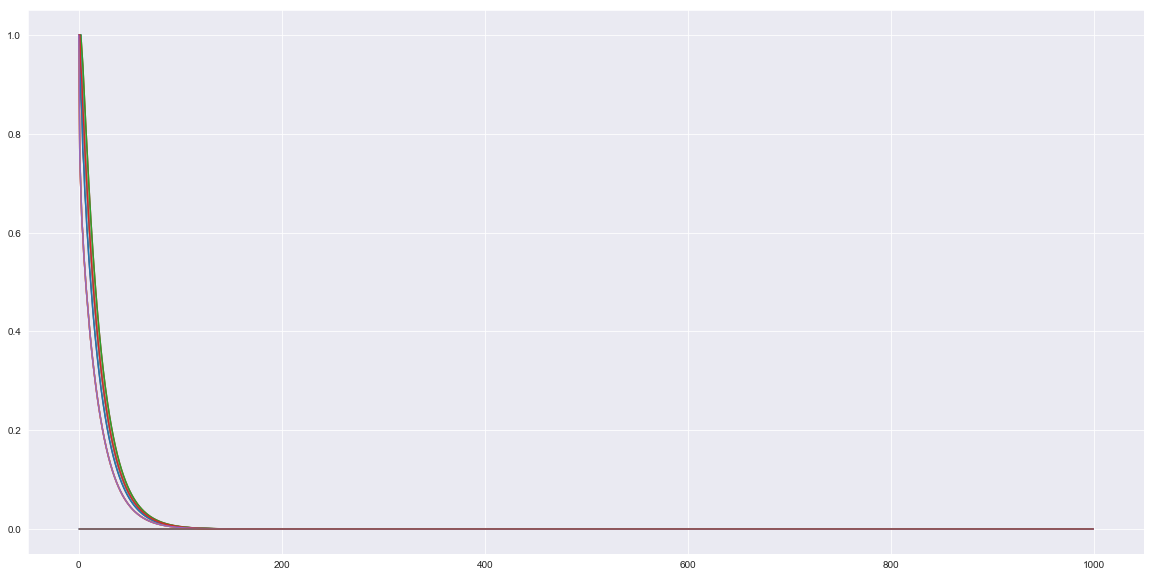

In [38]:
plt.figure(figsize=(20, 10))
plt.plot(deltas)